# Set up and data loading 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("/Users/reynoldtakurachoruma/Downloads/amz_uk_price_prediction_dataset.csv")
df.head()
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
count,2.443651e+06,2443651,2443651,2.443651e+06,2.443651e+06,2.443651e+06,2443651,2.443651e+06,2443651
unique,NaN,2222742,2077591,NaN,NaN,NaN,2,NaN,296
top,NaN,B083L94P36,OYhmc Portable Pedal Exerc,NaN,NaN,NaN,False,NaN,Sports & Outdoors
freq,NaN,7,723,NaN,NaN,NaN,2435671,NaN,836265
mean,1.370545e+06,NaN,NaN,2.152836e+00,4.806278e+02,8.924381e+01,NaN,2.589699e+01,NaN
std,8.160562e+05,NaN,NaN,2.194865e+00,5.944124e+03,3.456089e+02,NaN,2.404837e+02,NaN
min,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN
25%,6.589215e+05,NaN,NaN,0.000000e+00,0.000000e+00,9.990000e+00,NaN,0.000000e+00,NaN
50%,1.349029e+06,NaN,NaN,0.000000e+00,0.000000e+00,1.909000e+01,NaN,0.000000e+00,NaN
75%,2.060686e+06,NaN,NaN,4.400000e+00,5.900000e+01,4.599000e+01,NaN,0.000000e+00,NaN


# Understanding product categories 

## Frequency tables 


In [3]:
cat_col = "category"   # adjust if different

cat_freq = df[cat_col].value_counts(dropna=False)
top5_cats = cat_freq.head(5)

cat_freq.head(10)
top5_cats
cat_freq_rel = df[cat_col].value_counts(normalize=True).head(10)
frequency_table = pd.DataFrame({'Count': cat_freq.head(10), 'Relative Frequency': cat_freq_rel})
frequency_table


,Count,Relative Frequency
category,,
Sports & Outdoors,836265,0.342219
Beauty,19312,0.007903
"Handmade Clothing, Shoes & Accessories",19229,0.007869
Bath & Body,19092,0.007813
Birthday Gifts,18978,0.007766
Manicure & Pedicure Products,18940,0.007751
Skin Care,18769,0.007681
Make-up,18756,0.007675
Hair Care,18735,0.007667


# Sanity check

In [5]:
cat_freq_rel = df["category"].value_counts(normalize=True)
cat_freq_rel.sum()          # should be 1.0
(cat_freq_rel < 0.01).mean()


np.float64(0.9966216216216216)

# Visualizations

## Bar chart for all/top categories 

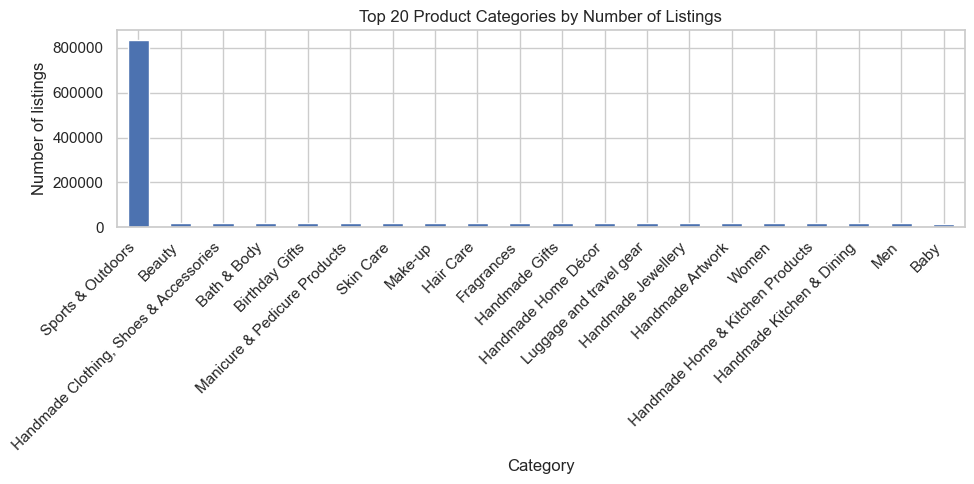

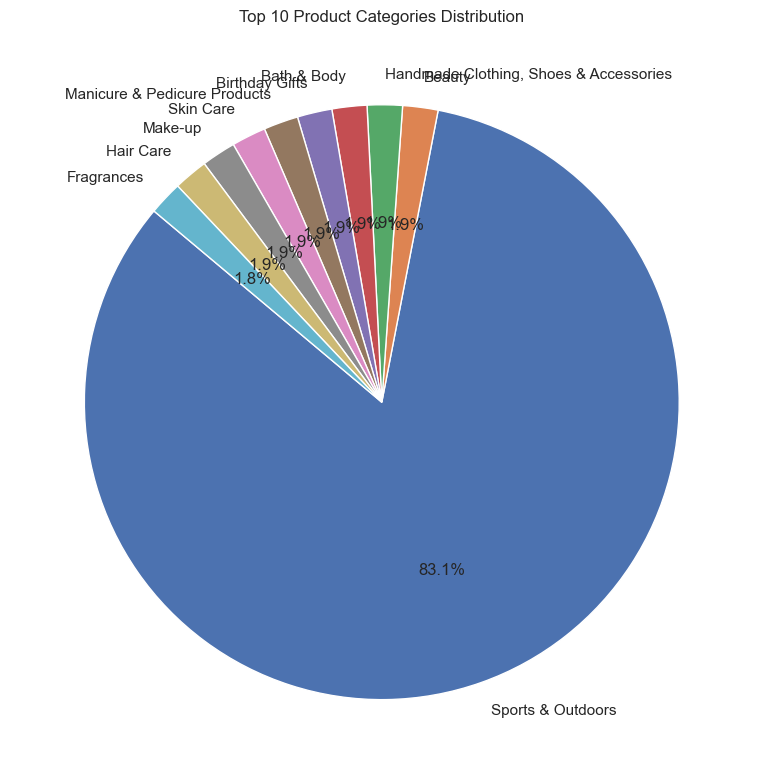

In [6]:
plt.figure(figsize=(10, 5))
cat_freq.head(20).plot(kind="bar")
plt.title("Top 20 Product Categories by Number of Listings")
plt.xlabel("Category")
plt.ylabel("Number of listings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
top_categories = cat_freq.head(10)
plt.figure(figsize=(8, 8))
top_categories.plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Product Categories Distribution")
plt.ylabel("")  # Hide y-label for pie chart
plt.tight_layout()
plt.show()

# Part2: Delving into product pricing

In [ ]:
price_col = "price"  # adjust name
df[price_col] = pd.to_numeric(df[price_col], errors="coerce")
price = df[price_col].dropna()
describe = price.describe()
describe


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

# Measure of Centrality 

In [ ]:
price_mean = price.mean()
price_median = price.median()
price_mode = price.mode().iloc[0] if not price.mode().empty else np.nan

price_mean, price_median, price_mode


(np.float64(89.24380943923663), np.float64(19.09), np.float64(9.99))

# Measure of dispersion

In [ ]:
price_var = price.var()
price_std = price.std()
price_min = price.min()
price_max = price.max()
price_range = price_max - price_min
q1 = price.quantile(0.25)
q3 = price.quantile(0.75)
price_iqr = q3 - q1

price_var, price_std, price_range, price_iqr


(np.float64(119445.48532254907),
 np.float64(345.60886175349884),
 np.float64(100000.0),
 np.float64(36.0))

# Visualizations 

### Histogram & Box plot for prices and outliers 

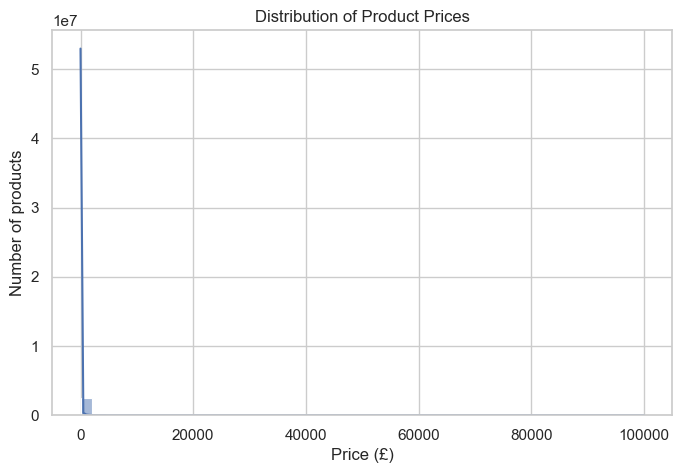

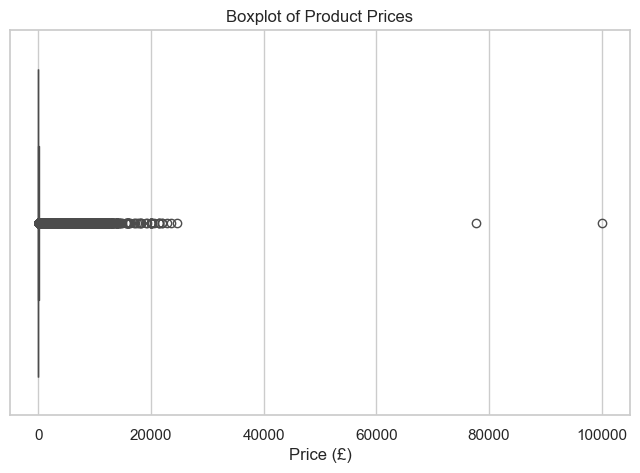

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(price, bins=50, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (£)")
plt.ylabel("Number of products")
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(x=price)
plt.title("Boxplot of Product Prices")
plt.xlabel("Price (£)")
plt.show()

# Show a log-scale version

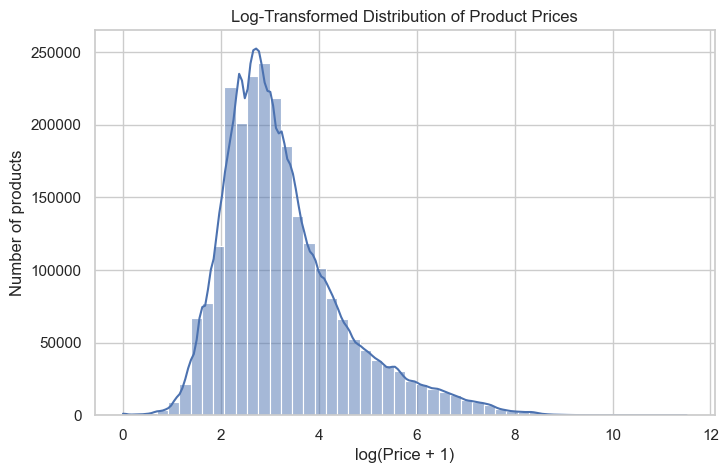

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(price), bins=50, kde=True)
plt.title("Log-Transformed Distribution of Product Prices")
plt.xlabel("log(Price + 1)")
plt.ylabel("Number of products")
plt.show()


# Part3 : Unpacking product ratings 

In [ ]:
# choose the correct rating column (fallback to 'stars' which exists in this dataset)
if "rating" in df.columns:
	rating_col = "rating"
elif "stars" in df.columns:
	rating_col = "stars"
else:
	raise KeyError("Neither 'rating' nor 'stars' column found in the dataframe.")

# convert the chosen column to numeric once and drop missing values
df[rating_col] = pd.to_numeric(df[rating_col], errors="coerce")
rating = df[rating_col].dropna()


# Centrality of ratings 

In [ ]:
rating_mean = rating.mean()
rating_median = rating.median()
rating_mode = rating.mode().iloc[0] if not rating.mode().empty else np.nan

rating_var = rating.var()
rating_std = rating.std()
q1_r = rating.quantile(0.25)
q3_r = rating.quantile(0.75)
rating_iqr = q3_r - q1_r

rating_skew = rating.skew()
rating_kurt = rating.kurtosis()


# Dispersion of ratings 

In [ ]:
rating_var = rating.var()
rating_std = rating.std()
q1_r = rating.quantile(0.25)
q3_r = rating.quantile(0.75)
rating_iqr = q3_r - q1_r

rating_var, rating_std, rating_iqr


(np.float64(4.817434029796862),
 np.float64(2.1948653785134207),
 np.float64(4.4))

# Shape :skewness and kurtosis

In [ ]:
rating_skew = rating.skew()
rating_kurt = rating.kurtosis()

rating_skew, rating_kurt


(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

# Histogram ratings 

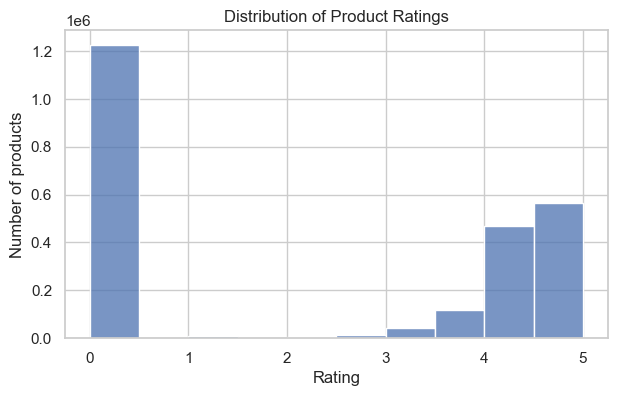

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(rating, bins=np.arange(rating.min(), rating.max() + 0.5, 0.5), kde=False)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of products")
plt.show()


# Business centric report

# Business report: Amazon UK product insights
## Product categories
There are 296 product categories; Sports & Outdoors alone accounts for about 34% of all listings, while roughly 99.7% of categories each contribute less than 1% of listings, which is characteristic of a long‑tail structure.
​

From a business perspective, Sports & Outdoors is the main battlefield for competition and visibility, whereas many small, niche categories each have low individual share but together form a sizable tail of specialized offerings that can be targeted for differentiation and focused marketing.
​

## Product pricing
After cleaning, prices have a median of about £19.09, with 25% of products below roughly £9.99 and 75% below about £45.99, so the bulk of products are in a £10–£46 band.
​

The maximum price reaches £100,000 and the standard deviation is very large, indicating a strongly right‑skewed distribution with extreme outliers; most products cluster in a mid‑market price range (roughly £10–£50), while a relatively small set of very high‑priced items inflates the mean and spread.
​

The raw price histogram is dominated by low to mid prices and visually compressed by a few very expensive products; using a log‑scale (log(Price + 1)) histogram makes the main mass of prices more interpretable and is better suited for defining typical price bands and supporting pricing decisions.
​

## Product ratings
The raw stars column contains many 0 values, and the percentile summary shows both the 25th percentile and median at 0, which indicates that 0 is being used to represent “no rating” rather than a genuine customer score.
​

In Amazon‑like systems, valid ratings usually range from 1 to 5, so including 0 in the analysis would artificially pull the mean down and distort skewness and kurtosis; for a realistic view of customer sentiment, entries with stars == 0 should therefore be excluded before computing rating averages, variability, skewness, kurtosis, and the ratings histogram.
​